In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import gc
%matplotlib inline
# 禁用科学计数法
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [27]:
plt.rcParams['font.family'] = 'SimHei'  # 中文字体

In [3]:
item = pd.read_csv('./Antai_AE_round1_item_attr_20190626/Antai_AE_round1_item_attr_20190626.csv')
train = pd.read_csv('./Antai_AE_round1_train_20190626/Antai_AE_round1_train_20190626.csv')
test = pd.read_csv('./Antai_AE_round1_test_20190626.csv')
submit = pd.read_csv('./Antai_AE_round1_submit_20190715.csv')

In [4]:
item

,item_id,cate_id,store_id,item_price
0,240607,1495,12239,1
1,285232,1498,12239,1
2,113669,1503,12239,1
3,253601,1422,12239,1
4,246568,1497,12239,1
...,...,...,...,...
2832664,12104195,53,49499,20226
2832665,10085224,52,49499,20227
2832666,12172445,53,49499,20228
2832667,12691425,53,49499,20229


In [5]:
train

,buyer_country_id,buyer_admin_id,item_id,create_order_time,irank
0,xx,8362078,1,2018-08-10 23:49:44,12
1,xx,9694304,2,2018-08-03 23:55:07,9
2,yy,101887,3,2018-08-27 08:31:26,3
3,xx,8131786,3,2018-08-31 06:00:19,9
4,xx,9778613,5,2018-08-21 06:01:56,14
...,...,...,...,...,...
12868504,yy,376096,13046731,2018-08-27 01:12:25,2
12868505,yy,453532,13046732,2018-08-29 06:54:43,2
12868506,yy,151465,13046732,2018-08-31 07:49:58,3
12868507,xx,12552770,13046734,2018-08-28 22:47:51,13


In [6]:
test

,buyer_country_id,buyer_admin_id,item_id,create_order_time,irank
0,yy,1061132,189045,2018-07-17 07:43:40,18
1,yy,1081430,10713670,2018-07-17 09:43:15,8
2,yy,1918135,10546322,2018-07-17 11:11:34,9
3,yy,103277,5199603,2018-07-17 13:27:44,24
4,yy,103277,2477273,2018-07-17 13:27:44,22
...,...,...,...,...,...
166827,yy,481075,4341301,2018-08-31 23:58:40,3
166828,yy,1048308,422053,2018-08-31 23:58:41,3
166829,yy,1048308,8261153,2018-08-31 23:58:41,2
166830,yy,1048308,3690841,2018-08-31 23:58:41,4


In [7]:
submit

,152,343131,2140290,2600629,1554159,12211445,776612,1630164,3901301,8353580,...,2327622,2014295,5076158,5042708,818444,10451831,4333367,9437487,8469786,9465790
0,282,8988184,2210260,96479,4052816,7982989,11143899,10070236,2002400,8757854,...,5630838,8607737,7740462,7028968,9167824,12938507,6399956,3109441,10636176,6255625
1,321,11140901,4618502,9666424,421308,8443514,12341414,4133929,4374880,9104983,...,12975999,10793761,7524523,666863,204808,8893340,7431033,1773069,12970909,9373627
2,809,692592,9851186,5206030,1210732,6016462,6971778,11615323,7263674,10901782,...,3227122,10539551,2802000,8251066,9515496,7065316,11997137,4438427,6567724,7212577
3,870,8361014,2327622,5481981,7530272,11680535,6555249,6137574,914424,10445923,...,8757854,10578287,10715090,7176446,3165153,10144005,8753413,2800387,12152573,1068526
4,2410,6320318,7525163,10734361,9050161,11309657,686434,10621679,11493273,12031376,...,7999857,6024506,7726279,245564,8636658,7684124,5386552,956425,5701392,7358804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,13046601,1734849,5606701,9408209,9396451,3219540,11196080,9027864,9684444,5376813,...,1320984,10094245,10660875,7662944,8263643,9373627,10491106,11205354,10140052,12289509
11393,3106927,1734849,5606701,9408209,9396451,3219540,11196080,9027864,9684444,5376813,...,1320984,10094245,10660875,7662944,8263643,9373627,10491106,11205354,10140052,12289509
11394,12368445,1734849,5606701,9408209,9396451,3219540,11196080,9027864,9684444,5376813,...,1320984,10094245,10660875,7662944,8263643,9373627,10491106,11205354,10140052,12289509
11395,12858772,1734849,5606701,9408209,9396451,3219540,11196080,9027864,9684444,5376813,...,1320984,10094245,10660875,7662944,8263643,9373627,10491106,11205354,10140052,12289509


# 数据预处理

- 合并train和test文件
- 提取日期年月日等信息
- 关联商品价格、品类、店铺
- 转化每列数据类型为可存储的最小值，减少内存消耗
- 保存为hdf5格式文件，加速读取

In [8]:
df = pd.concat([train.assign(is_train=1), test.assign(is_train=0)])

df['create_order_time'] = pd.to_datetime(df['create_order_time'])
df['date'] = df['create_order_time'].dt.date
df['day'] = df['create_order_time'].dt.day
df['hour'] = df['create_order_time'].dt.hour

df = pd.merge(df, item, how='left', on='item_id')

In [9]:
df

,buyer_country_id,buyer_admin_id,item_id,create_order_time,irank,is_train,date,day,hour,cate_id,store_id,item_price
0,xx,8362078,1,2018-08-10 23:49:44,12,1,2018-08-10,10,23,2324.00,10013.00,4501.00
1,xx,9694304,2,2018-08-03 23:55:07,9,1,2018-08-03,3,23,3882.00,4485.00,2751.00
2,yy,101887,3,2018-08-27 08:31:26,3,1,2018-08-27,27,8,155.00,8341.00,656.00
3,xx,8131786,3,2018-08-31 06:00:19,9,1,2018-08-31,31,6,155.00,8341.00,656.00
4,xx,9778613,5,2018-08-21 06:01:56,14,1,2018-08-21,21,6,1191.00,1949.00,1689.00
...,...,...,...,...,...,...,...,...,...,...,...,...
13035336,yy,481075,4341301,2018-08-31 23:58:40,3,0,2018-08-31,31,23,2698.00,37777.00,1961.00
13035337,yy,1048308,422053,2018-08-31 23:58:41,3,0,2018-08-31,31,23,1889.00,17676.00,112.00
13035338,yy,1048308,8261153,2018-08-31 23:58:41,2,0,2018-08-31,31,23,1889.00,17676.00,65.00
13035339,yy,1048308,3690841,2018-08-31 23:58:41,4,0,2018-08-31,31,23,1889.00,17676.00,40.00


In [10]:
memory = df.memory_usage().sum() / 1024**2 
print('Before memory usage of properties dataframe is :', memory, " MB")

dtype_dict = {'buyer_admin_id' : 'int32', 
              'item_id' : 'int32', 
              'store_id' : pd.Int32Dtype(),
              'irank' : 'int16',
              'item_price' : pd.Int16Dtype(),
              'cate_id' : pd.Int16Dtype(),
              'is_train' : 'int8',
              'day' : 'int8',
              'hour' : 'int8',
             }

df = df.astype(dtype_dict)
memory = df.memory_usage().sum() / 1024**2 
print('After memory usage of properties dataframe is :', memory, " MB")
del train,test; gc.collect()

Before memory usage of properties dataframe is : 1093.9694747924805  MB
After memory usage of properties dataframe is : 596.7106781005859  MB


235

In [14]:
for col in ['store_id', 'item_price', 'cate_id']:
    df[col] = df[col].fillna(0).astype(np.int32).replace(0, np.nan)
df.to_hdf('./data/train_test.h5', '1.0')

D:\ProgramData\Anaconda3\envs\llm\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '1.0'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\3987734952.py:3: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['buyer_country_id', 'date'], dtype='object')]

  df.to_hdf('./data/train_test.h5', '1.0')


In [16]:
%%time
df = pd.read_hdf('./data/train_test.h5', '1.0')

CPU times: total: 5.28 s
Wall time: 13.6 s


In [17]:
%%time
train = pd.read_csv('./Antai_AE_round1_train_20190626/Antai_AE_round1_train_20190626.csv')
test = pd.read_csv('./Antai_AE_round1_test_20190626.csv')
item = pd.read_csv('./Antai_AE_round1_item_attr_20190626/Antai_AE_round1_item_attr_20190626.csv')
del train, test; gc.collect()

CPU times: total: 6.17 s
Wall time: 21.6 s


2213

# Overview: 数据内容

In [18]:
df.head()

,buyer_country_id,buyer_admin_id,item_id,create_order_time,irank,is_train,date,day,hour,cate_id,store_id,item_price
0,xx,8362078,1,2018-08-10 23:49:44,12,1,2018-08-10,10,23,2324.00,10013.00,4501.00
1,xx,9694304,2,2018-08-03 23:55:07,9,1,2018-08-03,3,23,3882.00,4485.00,2751.00
2,yy,101887,3,2018-08-27 08:31:26,3,1,2018-08-27,27,8,155.00,8341.00,656.00
3,xx,8131786,3,2018-08-31 06:00:19,9,1,2018-08-31,31,6,155.00,8341.00,656.00
4,xx,9778613,5,2018-08-21 06:01:56,14,1,2018-08-21,21,6,1191.00,1949.00,1689.00


In [19]:
# Null 空值统计
for pdf in [df, item]:
    for col in pdf.columns:
        print(col, pdf[col].isnull().sum())

buyer_country_id 0
buyer_admin_id 0
item_id 0
create_order_time 0
irank 0
is_train 0
date 0
day 0
hour 0
cate_id 26119
store_id 26119
item_price 26119
item_id 0
cate_id 0
store_id 0
item_price 0


In [20]:
df.describe()

,buyer_admin_id,item_id,create_order_time,irank,is_train,day,hour,cate_id,store_id,item_price
count,13035341.00,13035341.00,13035341,13035341.00,13035341.00,13035341.00,13035341.00,13009222.00,13009222.00,13009222.00
mean,6527293.86,6522519.78,2018-08-18 23:20:45.258000384,143.62,0.99,18.62,9.06,1498.53,40575.67,1099.75
min,1.00,1.00,2018-07-13 05:54:54,-32768.00,0.00,1.00,0.00,1.00,1.00,1.00
25%,3269515.00,3261386.00,2018-08-10 19:40:33,4.00,1.00,10.00,4.00,616.00,20648.00,123.00
50%,6528429.00,6522878.00,2018-08-19 13:55:45,8.00,1.00,19.00,8.00,1505.00,39368.00,246.00
75%,9787265.00,9784900.00,2018-08-27 11:57:00,16.00,1.00,27.00,13.00,2010.00,59273.00,700.00
max,13046721.00,13046734.00,2018-08-31 23:59:57,32767.00,1.00,31.00,23.00,4243.00,95105.00,20230.00
std,3764280.24,3765432.09,NaN,1573.84,0.11,9.21,6.56,903.26,24284.46,2880.00


In [21]:
item.describe()

,item_id,cate_id,store_id,item_price
count,2832669.00,2832669.00,2832669.00,2832669.00
mean,6429138.00,1481.10,40256.46,1124.00
std,3725431.44,923.09,24370.92,2110.62
min,1.00,1.00,1.00,1.00
25%,3224114.00,600.00,19850.00,180.00
50%,6391845.00,1499.00,38954.00,400.00
75%,9636216.00,2050.00,58406.00,1200.00
max,13046734.00,4243.00,95105.00,20230.00


# 数据探查

## 训练集与测试集

In [22]:
train = df['is_train']==1
test = df['is_train']==0

In [23]:
train_count = len(df[train])
print('训练集样本量是',train_count)
test_count = len(df[test])
print('测试集样本量是',test_count)
print('样本比例为：', train_count/test_count)

训练集样本量是 12868509
测试集样本量是 166832
样本比例为： 77.13453653975256


## buyer_country_id 国家编号

In [24]:
def groupby_cnt_ratio(df, col):
    if isinstance(col, str):
        col = [col]
    key = ['is_train', 'buyer_country_id'] + col
    
    # groupby function
    cnt_stat = df.groupby(key).size().to_frame('count')
    ratio_stat = (cnt_stat / cnt_stat.groupby(['is_train', 'buyer_country_id']).sum()).rename(columns={'count':'count_ratio'})
    return pd.merge(cnt_stat, ratio_stat, on=key, how='outer').sort_values(by=['count'], ascending=False)

In [25]:
groupby_cnt_ratio(df, [])

count  count_ratio
is_train buyer_country_id                       
1        xx                10635642         1.00
         yy                 2232867         1.00
0        yy                  166832         1.00

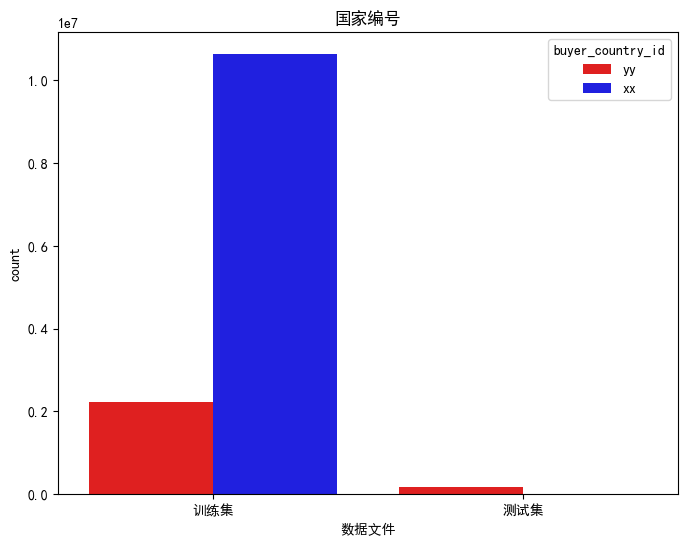

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='is_train', data = df, palette=['red', 'blue'], hue='buyer_country_id', order=[1, 0])
plt.xticks(np.arange(2), ('训练集', '测试集'))
plt.xlabel('数据文件')
plt.title('国家编号');

## buyer_admin_id 用户编号

In [29]:
print('训练集中用户数量',len(df[train]['buyer_admin_id'].unique()))
print('测试集中用户数量',len(df[test]['buyer_admin_id'].unique()))

训练集中用户数量 809213
测试集中用户数量 11398


In [30]:
union = list(set(df[train]['buyer_admin_id'].unique()).intersection(set(df[test]['buyer_admin_id'].unique())))
print('同时在训练集测试集出现的有6位用户，id如下：',union)

同时在训练集测试集出现的有6位用户，id如下： [12647969, 13000419, 3106927, 12858772, 12929117, 12368445]


In [31]:
df[train][df['buyer_admin_id'].isin(union)].sort_values(by=['buyer_admin_id','irank']).head(10)

C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\3035833051.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[train][df['buyer_admin_id'].isin(union)].sort_values(by=['buyer_admin_id','irank']).head(10)


,buyer_country_id,buyer_admin_id,item_id,create_order_time,irank,is_train,date,day,hour,cate_id,store_id,item_price
7546704,xx,3106927,7645546,2018-08-30 02:49:22,1,1,2018-08-30,30,2,1164.00,73781.00,770.00
4582539,xx,3106927,4639151,2018-08-30 02:49:22,2,1,2018-08-30,30,2,2214.00,53190.00,1669.00
11953258,xx,3106927,12122118,2018-08-30 02:49:22,3,1,2018-08-30,30,2,236.00,73781.00,884.00
255625,xx,3106927,258860,2018-08-30 02:49:22,4,1,2018-08-30,30,2,189.00,24221.00,900.00
7402817,xx,3106927,7499372,2018-08-30 02:49:22,5,1,2018-08-30,30,2,2214.00,32535.00,2714.00
9483312,xx,3106927,9613063,2018-08-30 02:49:22,6,1,2018-08-30,30,2,3069.00,73781.00,110.00
2740080,xx,3106927,2773189,2018-08-27 08:18:23,10,1,2018-08-27,27,8,1865.00,49499.00,20067.00
12152249,xx,3106927,12324030,2018-08-27 07:15:05,11,1,2018-08-27,27,7,880.00,92968.00,1764.00
2201292,xx,3106927,2227720,2018-08-19 02:36:36,12,1,2018-08-19,19,2,1164.00,6404.00,1900.00
6717641,xx,3106927,6804187,2018-08-19 02:33:39,13,1,2018-08-19,19,2,1164.00,52421.00,230.00


In [32]:
df[test][df['buyer_admin_id'].isin(union)].sort_values(by=['buyer_admin_id','irank']).head(3)

C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\3087106983.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[test][df['buyer_admin_id'].isin(union)].sort_values(by=['buyer_admin_id','irank']).head(3)


,buyer_country_id,buyer_admin_id,item_id,create_order_time,irank,is_train,date,day,hour,cate_id,store_id,item_price
13016145,yy,3106927,202354,2018-08-30 02:48:40,7,0,2018-08-30,30,2,642.00,24221.00,989.00
13008981,yy,3106927,6994414,2018-08-29 05:48:06,8,0,2018-08-29,29,5,7.00,37411.00,1521.00
13008982,yy,3106927,6994414,2018-08-29 05:48:06,9,0,2018-08-29,29,5,7.00,37411.00,1521.00


In [33]:
df[(train) & (df['irank']==1) & (df['buyer_admin_id'].isin(['12858772','3106927','12368445']))]

,buyer_country_id,buyer_admin_id,item_id,create_order_time,irank,is_train,date,day,hour,cate_id,store_id,item_price


## 用户记录数分布

In [34]:
admin_cnt = groupby_cnt_ratio(df, 'buyer_admin_id')
admin_cnt.groupby(['is_train','buyer_country_id']).head(3)

count  count_ratio
is_train buyer_country_id buyer_admin_id                    
1        xx               10828801        42751         0.00
                          10951390        23569         0.00
                          11223615        19933         0.00
         yy               2381782          3480         0.00
                          2333316          1944         0.00
                          2365356          1686         0.00
0        yy               2041038          1386         0.01
                          2070430           399         0.00
                          1144848           286         0.00

In [35]:
# 用户购买记录数——最多、最少、中位数
admin_cnt.groupby(['is_train','buyer_country_id'])['count'].agg(['max','min','median'])

max  min  median
is_train buyer_country_id                    
0        yy                 1386    7   11.00
1        xx                42751    8   11.00
         yy                 3480    8   12.00

C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\3644970904.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  sns.kdeplot(admin_cnt.loc[(1, 'xx')]['count'].values, ax=ax[0]).set_title('训练集--xx国用户记录数')
C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\3644970904.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  sns.kdeplot(admin_cnt[admin_cnt['count']<50].loc[(1, 'yy')]['count'].values, ax=ax[1]).set_title('yy国用户记录数')
C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\3644970904.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  sns.kdeplot(admin_cnt[admin_cnt['count']<50].loc[(0, 'yy')]['count'].values, ax=ax[1]);


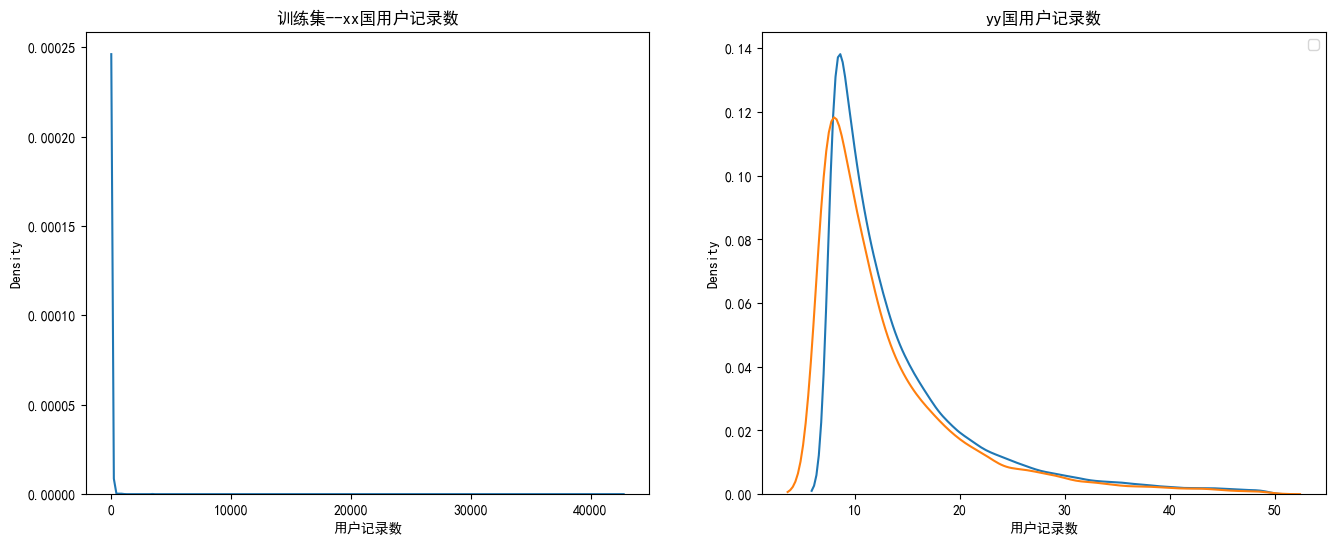

In [36]:
fig, ax = plt.subplots(1, 2 ,figsize=(16,6))
ax[0].set(xlabel='用户记录数')
sns.kdeplot(admin_cnt.loc[(1, 'xx')]['count'].values, ax=ax[0]).set_title('训练集--xx国用户记录数')

ax[1].legend(labels=['训练集', '测试集'], loc="upper right")
ax[1].set(xlabel='用户记录数')
sns.kdeplot(admin_cnt[admin_cnt['count']<50].loc[(1, 'yy')]['count'].values, ax=ax[1]).set_title('yy国用户记录数')
sns.kdeplot(admin_cnt[admin_cnt['count']<50].loc[(0, 'yy')]['count'].values, ax=ax[1]);

In [37]:
admin_cnt.columns = ['记录数', '占比']
admin_user_cnt = groupby_cnt_ratio(admin_cnt, '记录数')
admin_user_cnt.columns = ['人数', '人数占比']
admin_user_cnt.head()

人数  人数占比
is_train buyer_country_id 记录数              
1        xx               8    118155  0.18
                          9     91757  0.14
                          10    72936  0.11
                          11    57678  0.09
                          12    46534  0.07

In [38]:
# xx国——用户记录数与用户数
admin_user_cnt.loc[(1,'xx')][['人数','人数占比']].T

C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\313832335.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  admin_user_cnt.loc[(1,'xx')][['人数','人数占比']].T


记录数,8,9,10,11,12,13,14,15,16,17,...,521,556,526,528,529,537,545,549,550,554
人数,118155.00,91757.00,72936.00,57678.00,46534.00,38114.00,31432.00,26735.00,22352.00,18742.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
人数占比,0.18,0.14,0.11,0.09,0.07,0.06,0.05,0.04,0.03,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [40]:
# yy国——记录数与用户数占比
admin_user_cnt.loc[([1,0],'yy',slice(None))][['人数','人数占比']].unstack(0).drop('人数',1).head(10)

TypeError: drop() takes from 1 to 2 positional arguments but 3 were given

C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\2387015682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='记录数', y='人数占比', data=admin_plot[(admin_plot['记录数']<50) & (admin_plot['buyer_country_id']=='xx')],


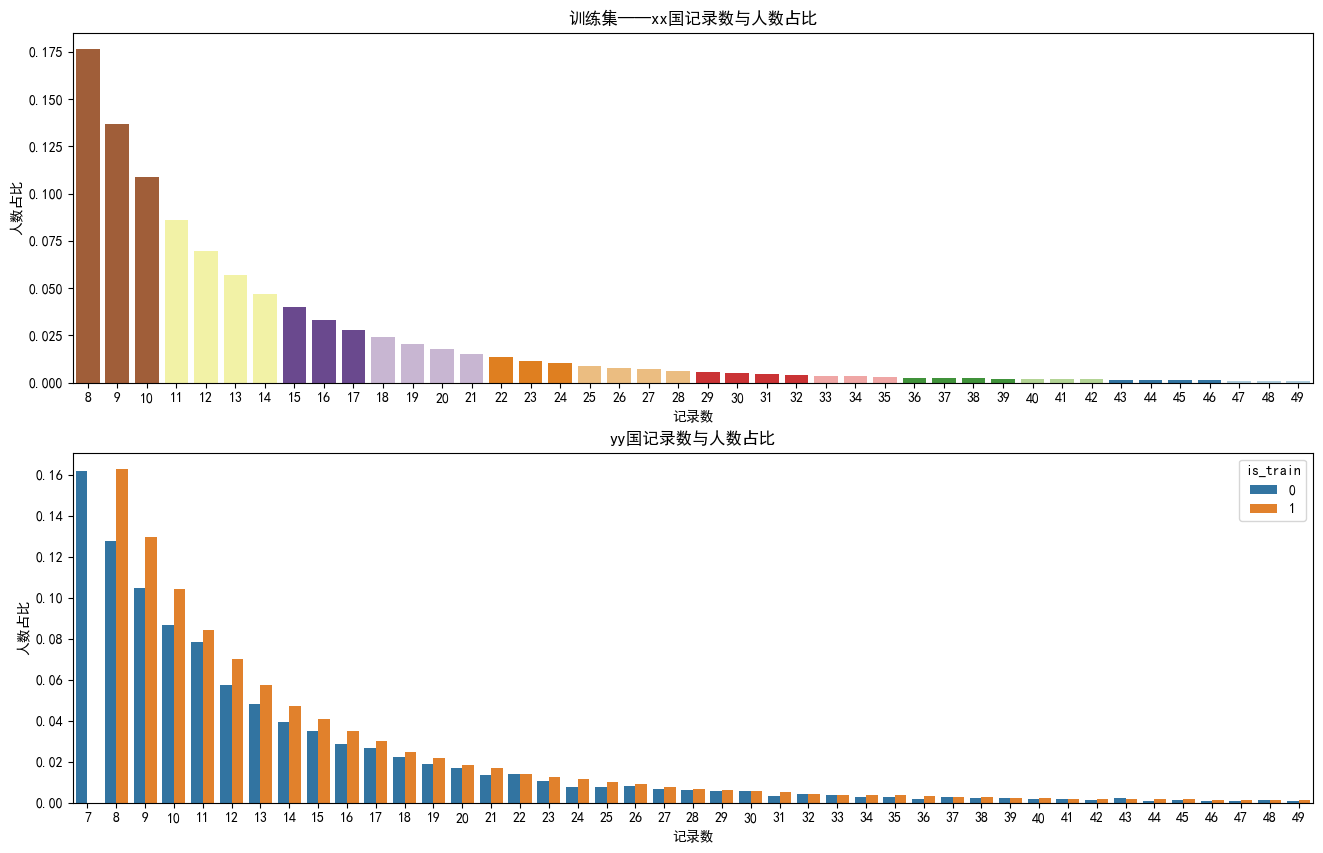

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))
admin_plot = admin_user_cnt.reset_index()
sns.barplot(x='记录数', y='人数占比', data=admin_plot[(admin_plot['记录数']<50) & (admin_plot['buyer_country_id']=='xx')], 
            estimator=np.mean, ax=ax[0],palette="Paired_r").set_title('训练集——xx国记录数与人数占比');

sns.barplot(x='记录数', y='人数占比', hue='is_train', data=admin_plot[(admin_plot['记录数']<50) & (admin_plot['buyer_country_id']=='yy')], 
            estimator=np.mean, ax=ax[1]).set_title('yy国记录数与人数占比');

## item_id 商品编号

In [43]:
print('商品表中商品数：',len(item['item_id'].unique()))
print('训练集中商品数：',len(df[train]['item_id'].unique()))
print('验证集中商品数：',len(df[test]['item_id'].unique()))
print('仅训练集有的商品数：',len(list(set(df[train]['item_id'].unique()).difference(set(df[test]['item_id'].unique())))))
print('仅验证集有的商品数：',len(list(set(df[test]['item_id'].unique()).difference(set(df[train]['item_id'].unique())))))
print('训练集验证集共同商品数：',len(list(set(df[train]['item_id'].unique()).intersection(set(df[test]['item_id'].unique())))))
print('训练集中不在商品表的商品数：',len(list(set(df[train]['item_id'].unique()).difference(set(item['item_id'].unique())))))
print('验证集中不在商品表的商品数：',len(list(set(df[test]['item_id'].unique()).difference(set(item['item_id'].unique())))))

商品表中商品数： 2832669
训练集中商品数： 2812048
验证集中商品数： 104735
仅训练集有的商品数： 2735801
仅验证集有的商品数： 28488
训练集验证集共同商品数： 76247
训练集中不在商品表的商品数： 7733
验证集中不在商品表的商品数： 313


## 商品销量

In [44]:
item_cnt = groupby_cnt_ratio(df, 'item_id')
item_cnt.columns=['销量', '总销量占比']
item_cnt.reset_index(inplace=True)

In [45]:
top_item_plot = item_cnt.groupby(['is_train','buyer_country_id']).head(10)

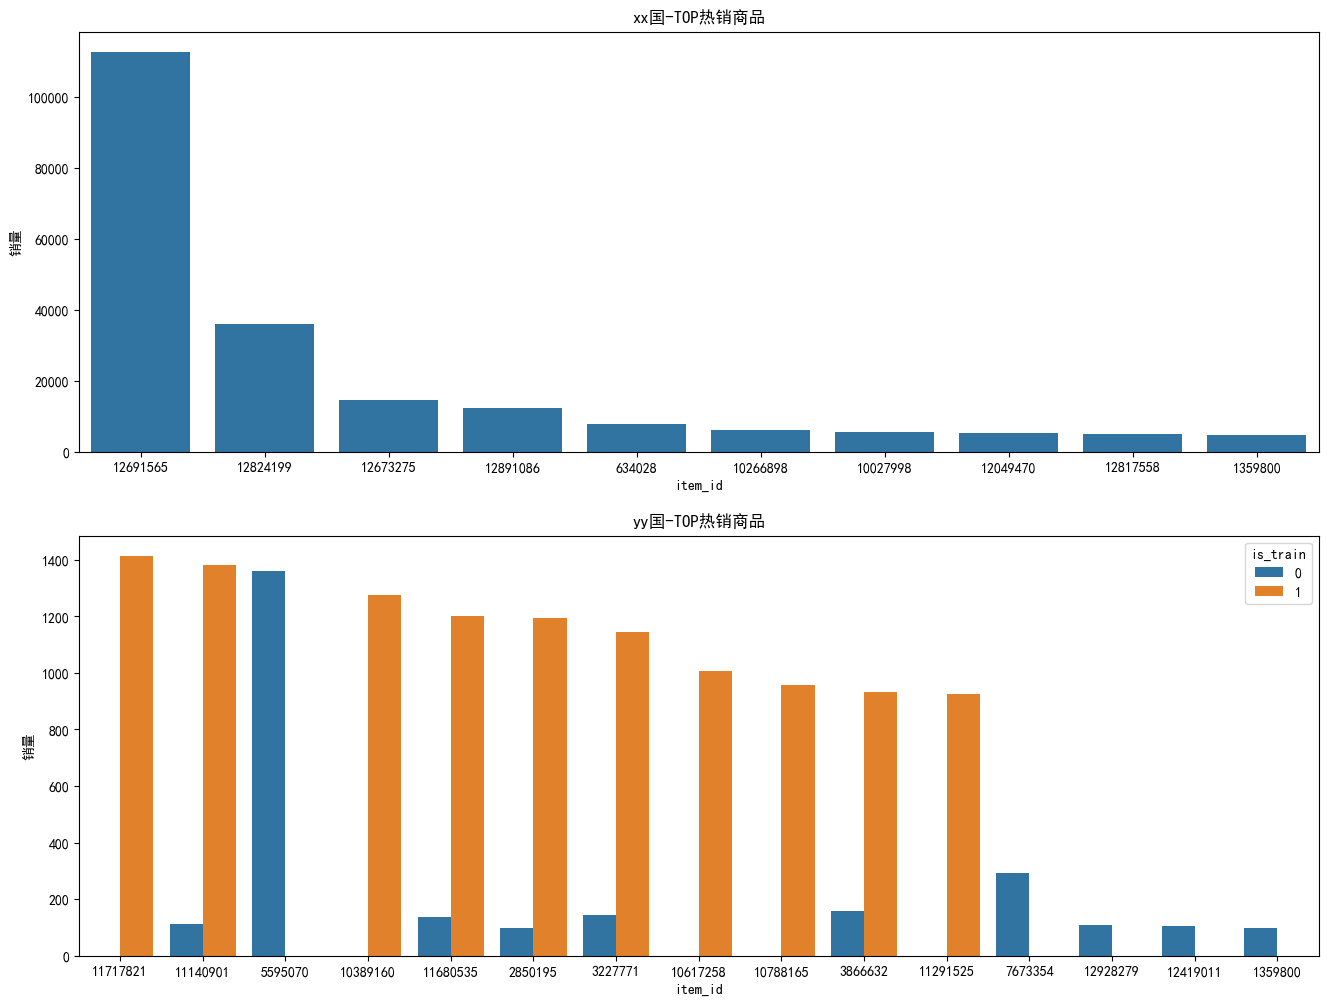

In [46]:

fig, ax = plt.subplots(2, 1, figsize=(16,12))
sns.barplot(x='item_id', y='销量', data=top_item_plot[top_item_plot['buyer_country_id']=='xx'], 
            order=top_item_plot['item_id'][top_item_plot['buyer_country_id']=='xx'], ax=ax[0], estimator=np.mean).set_title('xx国-TOP热销商品')
sns.barplot(x='item_id', y='销量', hue='is_train', data=top_item_plot[top_item_plot['buyer_country_id']=='yy'], 
            order=top_item_plot['item_id'][top_item_plot['buyer_country_id']=='yy'], ax=ax[1], estimator=np.mean).set_title('yy国-TOP热销商品');

## 整体商品销量分布

In [47]:
item_order_cnt = groupby_cnt_ratio(item_cnt, '销量')
item_order_cnt.columns = ['商品数', '占比']

In [48]:
item_order_cnt.groupby(['is_train','buyer_country_id']).head(5).sort_values(by=['buyer_country_id','is_train'])

商品数   占比
is_train buyer_country_id 销量              
1        xx               1   1331056 0.58
                          2    361829 0.16
                          3    164953 0.07
                          4     95629 0.04
                          5     61551 0.03
0        yy               1     81212 0.78
                          2     13083 0.12
                          3      4350 0.04
                          4      2123 0.02
                          5      1200 0.01
1        yy               1    625041 0.67
                          2    139607 0.15
                          3     55274 0.06
                          4     29848 0.03
                          5     17782 0.02

In [49]:
item_order_plot = item_order_cnt.reset_index()
item_order_plot = item_order_plot[item_order_plot['销量']<=8]

xx_item_order_plot = item_order_plot[item_order_plot['buyer_country_id']=='xx']
yy_item_order_plot = item_order_plot[item_order_plot['buyer_country_id']=='yy']
yy_item_order_plot_1 = yy_item_order_plot[yy_item_order_plot['is_train']==1]
yy_item_order_plot_0 = yy_item_order_plot[yy_item_order_plot['is_train']==0]

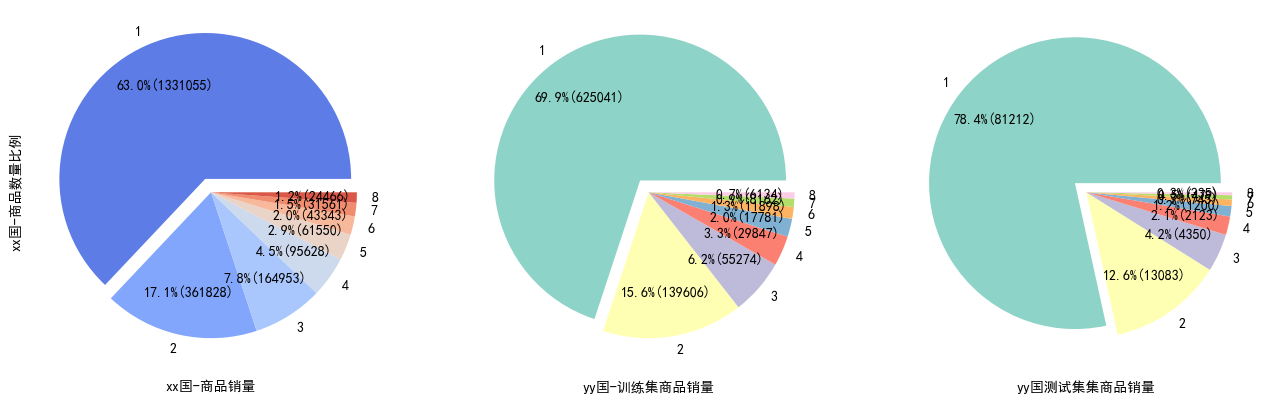

In [50]:
# 商品销量饼图
def text_style_func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%({:d})".format(pct, absolute)

def pie_param(ax, df, color_palette):
    return ax.pie(df['占比'].values, autopct=lambda pct: text_style_func(pct, df['商品数']), labels = df['销量'], 
                  explode = [0.1]+ np.zeros(len(df)-1).tolist(), pctdistance = 0.7, colors=sns.color_palette(color_palette, 8))

fig, ax = plt.subplots(1, 3, figsize=(16,12))
ax[0].set(xlabel='xx国-商品销量')
ax[0].set(ylabel='xx国-商品数量比例')
pie_param(ax[0], xx_item_order_plot, "coolwarm")
ax[1].set(xlabel='yy国-训练集商品销量')
pie_param(ax[1], yy_item_order_plot_1, "Set3")
ax[2].set(xlabel='yy国测试集集商品销量')
pie_param(ax[2], yy_item_order_plot_0, "Set3");

In [51]:
print(xx_item_order_plot.head(10)['占比'].sum())
print(yy_item_order_plot_1.head(10)['占比'].sum())
print(yy_item_order_plot_0.head(10)['占比'].sum())

0.9215598591503256
0.9643666018897873
0.9884661288012603


## cate_id 品类编号

In [52]:
print('商品品类数', len(item['cate_id'].unique()))
print('训练集商品品类数', len(df[train]['cate_id'].unique()))
print('测试集商品品类数', len(df[test]['cate_id'].unique()))

商品品类数 4243
训练集商品品类数 4239
测试集商品品类数 2727


## 各个品类下商品数量

In [53]:
cate_cnt = item.groupby(['cate_id']).size().to_frame('count').reset_index()
cate_cnt.sort_values(by=['count'], ascending=False).head(5)

,cate_id,count
578,579,170074
2395,2396,44467
1497,1498,42676
599,600,39729
1591,1592,34820


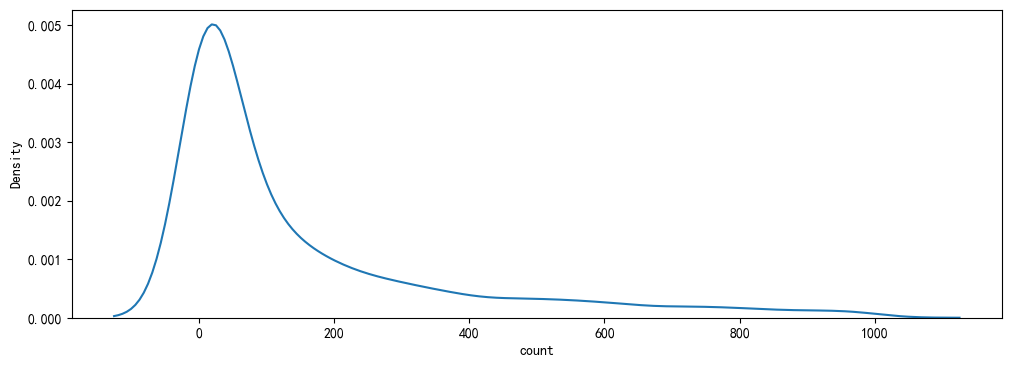

In [54]:
plt.figure(figsize=(12,4))
sns.kdeplot(data=cate_cnt[cate_cnt['count']<1000]['count']);

## store_id 店铺编号

In [55]:
print('商品店铺数', len(item['store_id'].unique()))
print('训练集店铺数', len(df[train]['store_id'].unique()))
print('测试集店铺数', len(df[train]['store_id'].unique()))

商品店铺数 95105
训练集店铺数 94970
测试集店铺数 94970


### 店铺下品类数量

In [56]:
store_cate_cnt = item.groupby(['store_id'])['cate_id'].nunique().to_frame('count').reset_index()
store_cate_cnt.sort_values(by=['count'], ascending=False).head(5)

,store_id,count
0,1,326
45594,45595,280
44983,44984,274
1870,1871,258
22034,22035,241


In [57]:
store_cnt_cate_cnt = store_cate_cnt.groupby(['count']).size().reset_index()
store_cnt_cate_cnt.columns = ['店铺品类数', '店铺数量']

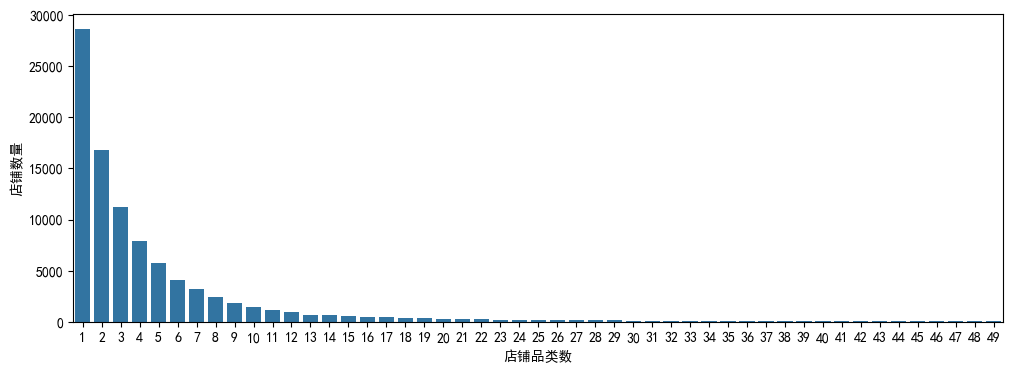

In [58]:
plt.figure(figsize=(12,4))
sns.barplot(x='店铺品类数', y='店铺数量', data=store_cnt_cate_cnt[store_cnt_cate_cnt['店铺品类数']<50], estimator=np.mean);

### 店铺下商品数量

In [59]:
store_item_cnt = item.groupby(['store_id'])['item_id'].nunique().to_frame('count').reset_index()
store_item_cnt.sort_values(by=['count'], ascending=False).head(5)

,store_id,count
0,1,6911
68671,68672,2435
33381,33382,2220
17544,17545,2053
82146,82147,2016


In [60]:
store_cnt_item_cnt = store_item_cnt.groupby(['count']).size().reset_index()
store_cnt_item_cnt.columns = ['店铺商品数', '店铺数量']

In [61]:
store_cnt_item_cnt.T

,0,1,2,3,4,5,6,7,8,9,...,619,620,621,622,623,624,625,626,627,628
店铺商品数,1,2,3,4,5,6,7,8,9,10,...,1556,1558,1642,1820,1997,2016,2053,2220,2435,6911
店铺数量,9129,6897,5593,4879,4206,3698,3374,3050,2773,2486,...,1,1,1,1,1,1,1,1,1,1


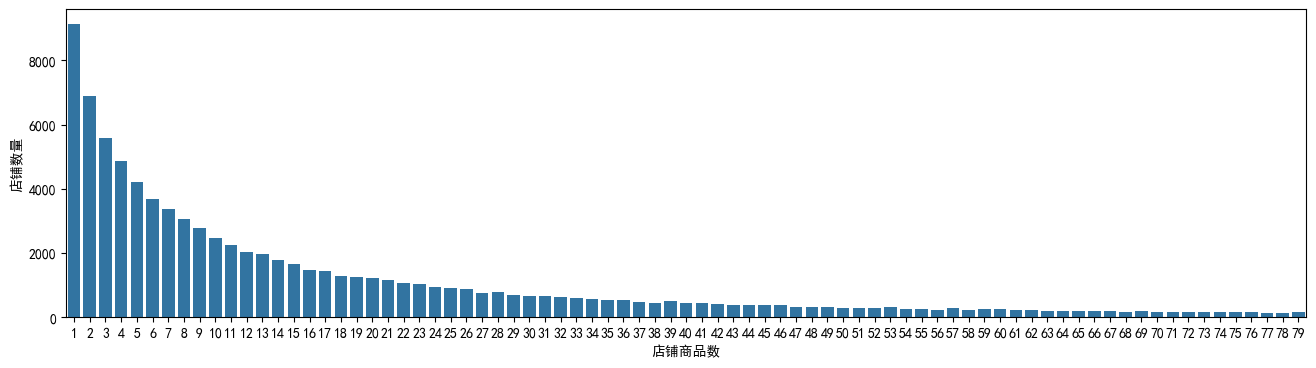

In [62]:
plt.figure(figsize=(16,4))
sns.barplot(x='店铺商品数', y='店铺数量', data=store_cnt_item_cnt[store_cnt_item_cnt['店铺商品数']<80], estimator=np.mean);

## item_price 商品价格

In [63]:
print(item['item_price'].max(), item['item_price'].min(), item['item_price'].mean(), item['item_price'].median())

20230 1 1124.0030755446542 400.0


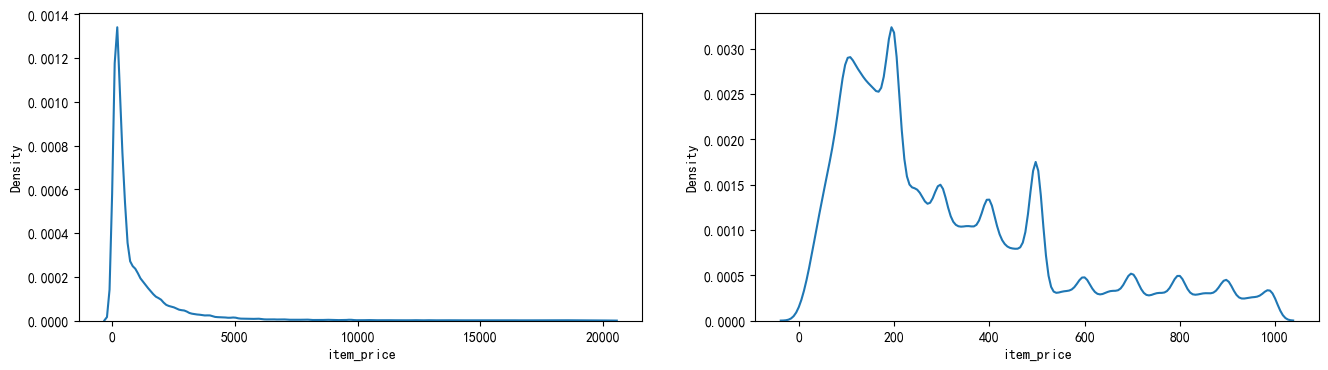

In [64]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.kdeplot(item['item_price'])
plt.subplot(122)
sns.kdeplot(item['item_price'][item['item_price']<1000]);

In [65]:
price_cnt = item.groupby(['item_price']).size().to_frame('count').reset_index()
price_cnt.sort_values(by=['count'], ascending=False).head(10)

,item_price,count
199,200,75872
499,500,61283
99,100,33826
399,400,27670
299,300,26044
198,199,18032
999,1000,16739
699,700,12028
100,101,11972
120,121,11833


### 有售商品价格

In [66]:
print(df[train]['item_price'].max(), df[train]['item_price'].min(), df[train]['item_price'].mean(), df[train]['item_price'].median())
print(df[test]['item_price'].max(), df[test]['item_price'].min(), df[test]['item_price'].mean(), df[test]['item_price'].median())

20230.0 1.0 1103.9060915681803 245.0
19907.0 1.0 778.7395852140734 270.0


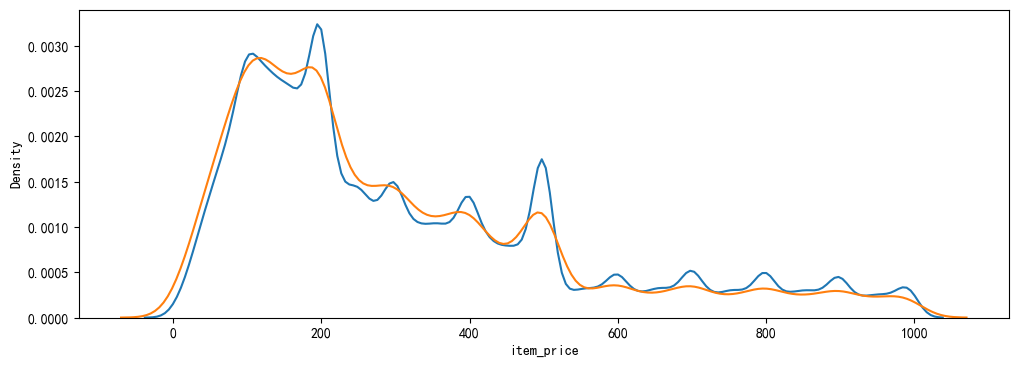

In [67]:
plt.figure(figsize=(12,4))
sns.kdeplot(df[train][df[train]['item_price']<1000][['item_id','item_price']].drop_duplicates()['item_price'])
sns.kdeplot(df[test][df[test]['item_price']<1000][['item_id','item_price']].drop_duplicates()['item_price']);

### 商品价格与销量

In [68]:
df[train].groupby(['item_price'])['item_id'].nunique().to_frame('商品数量').head()

,商品数量
item_price,
1.00,266
2.00,1305
3.00,204
4.00,152
5.00,133


In [69]:
price_cnt = groupby_cnt_ratio(df, 'item_price')
price_cnt.groupby(['is_train', 'buyer_country_id']).head(5)

count  count_ratio
is_train buyer_country_id item_price                     
1        xx               200.00      404366         0.04
                          500.00      201061         0.02
                          100.00      186473         0.02
                          17844.00    114631         0.01
                          121.00       92956         0.01
         yy               200.00       82625         0.04
                          500.00       48651         0.02
                          100.00       38838         0.02
                          300.00       27452         0.01
                          400.00       24144         0.01
0        yy               200.00        6846         0.04
                          500.00        3582         0.02
                          100.00        3019         0.02
                          300.00        2084         0.01
                          400.00        1765         0.01

### create_order_time 订单日期

In [70]:
print(df[train]['create_order_time'].min(), df[train]['create_order_time'].max())
print(df[test]['create_order_time'].min(), df[test]['create_order_time'].max())

2018-07-13 05:54:54 2018-08-31 23:59:57
2018-07-17 07:43:40 2018-08-31 23:58:56


In [71]:
train_df_seven = df[train][df[train]['create_order_time']<pd.to_datetime('2018-08-01')]
train_df_eight = df[train][df[train]['create_order_time']>pd.to_datetime('2018-08-01')]
train_df_seven = df[train][df[train]['create_order_time']<pd.to_datetime('2018-08-01')]
train_df_eight = df[train][df[train]['create_order_time']>pd.to_datetime('2018-08-01')]

In [72]:

print('7月数据量',len(df[train][df[train]['create_order_time']<pd.to_datetime('2018-08-01')]),
      '\n8月数据量',len(df[train][df[train]['create_order_time']>pd.to_datetime('2018-08-02')]))

7月数据量 17856 
8月数据量 12838990


In [73]:
date_cnt = groupby_cnt_ratio(df, 'date')
date_cnt.columns = ['当天销量', "占比"]
date_cnt = date_cnt.reset_index()

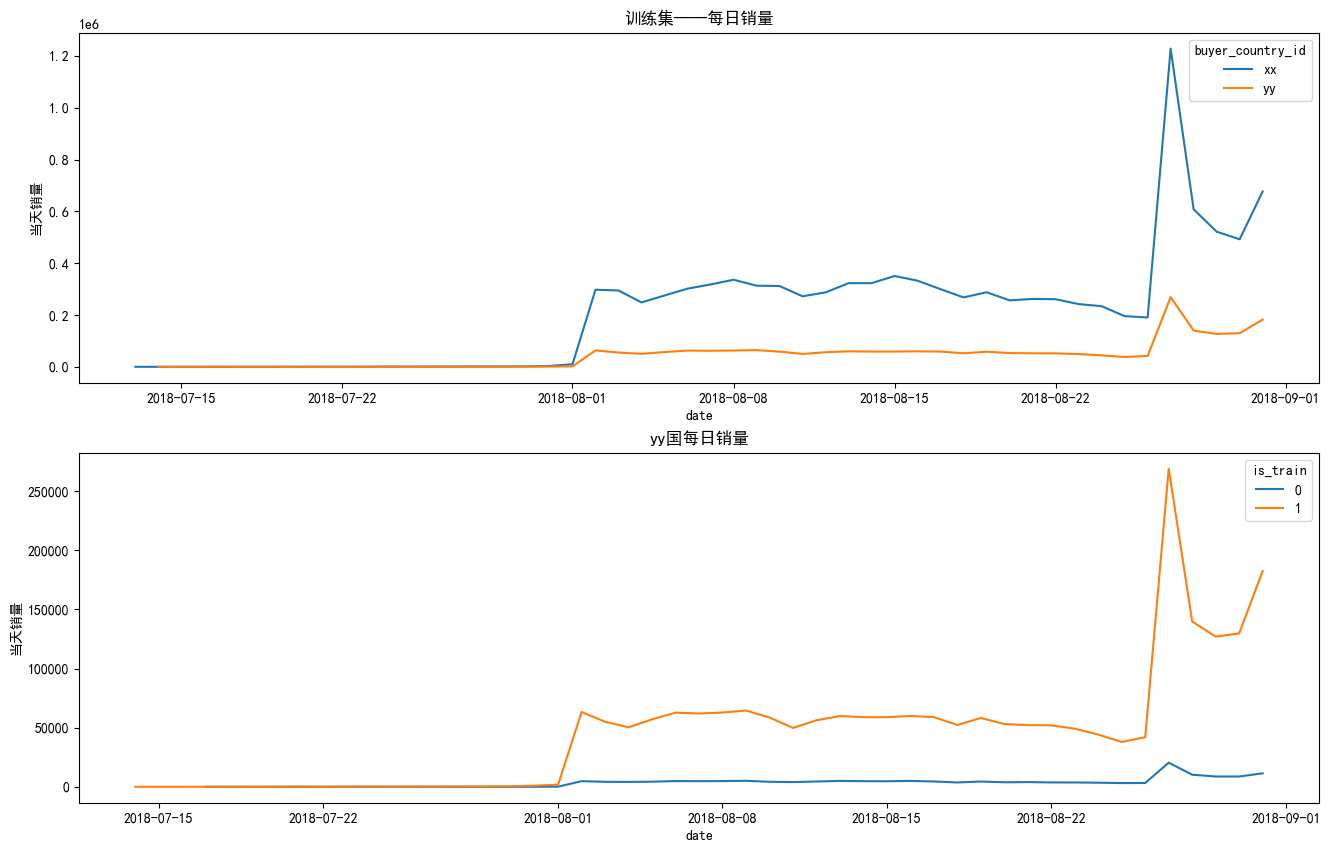

In [74]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))
sns.lineplot(x='date', y='当天销量', hue='buyer_country_id', data=date_cnt[(date_cnt['is_train']==1)], 
            estimator=np.mean, ax=ax[0]).set_title('训练集——每日销量');

sns.lineplot(x='date', y='当天销量', hue='is_train', data=date_cnt[(date_cnt['buyer_country_id']=='yy')], 
            estimator=np.mean, ax=ax[1]).set_title('yy国每日销量');

In [81]:
import datetime

In [86]:
seven = date_cnt[pd.to_datetime(date_cnt['date'])<pd.to_datetime('2018-08-02')]
eight = date_cnt[pd.to_datetime(date_cnt['date'])>=pd.to_datetime('2018-08-02')]

C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\1708177923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].astype(str)
C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\1708177923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].astype(str)
C:\Users\renyu\AppData\Local\Temp\ipykernel_63736\1708177923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

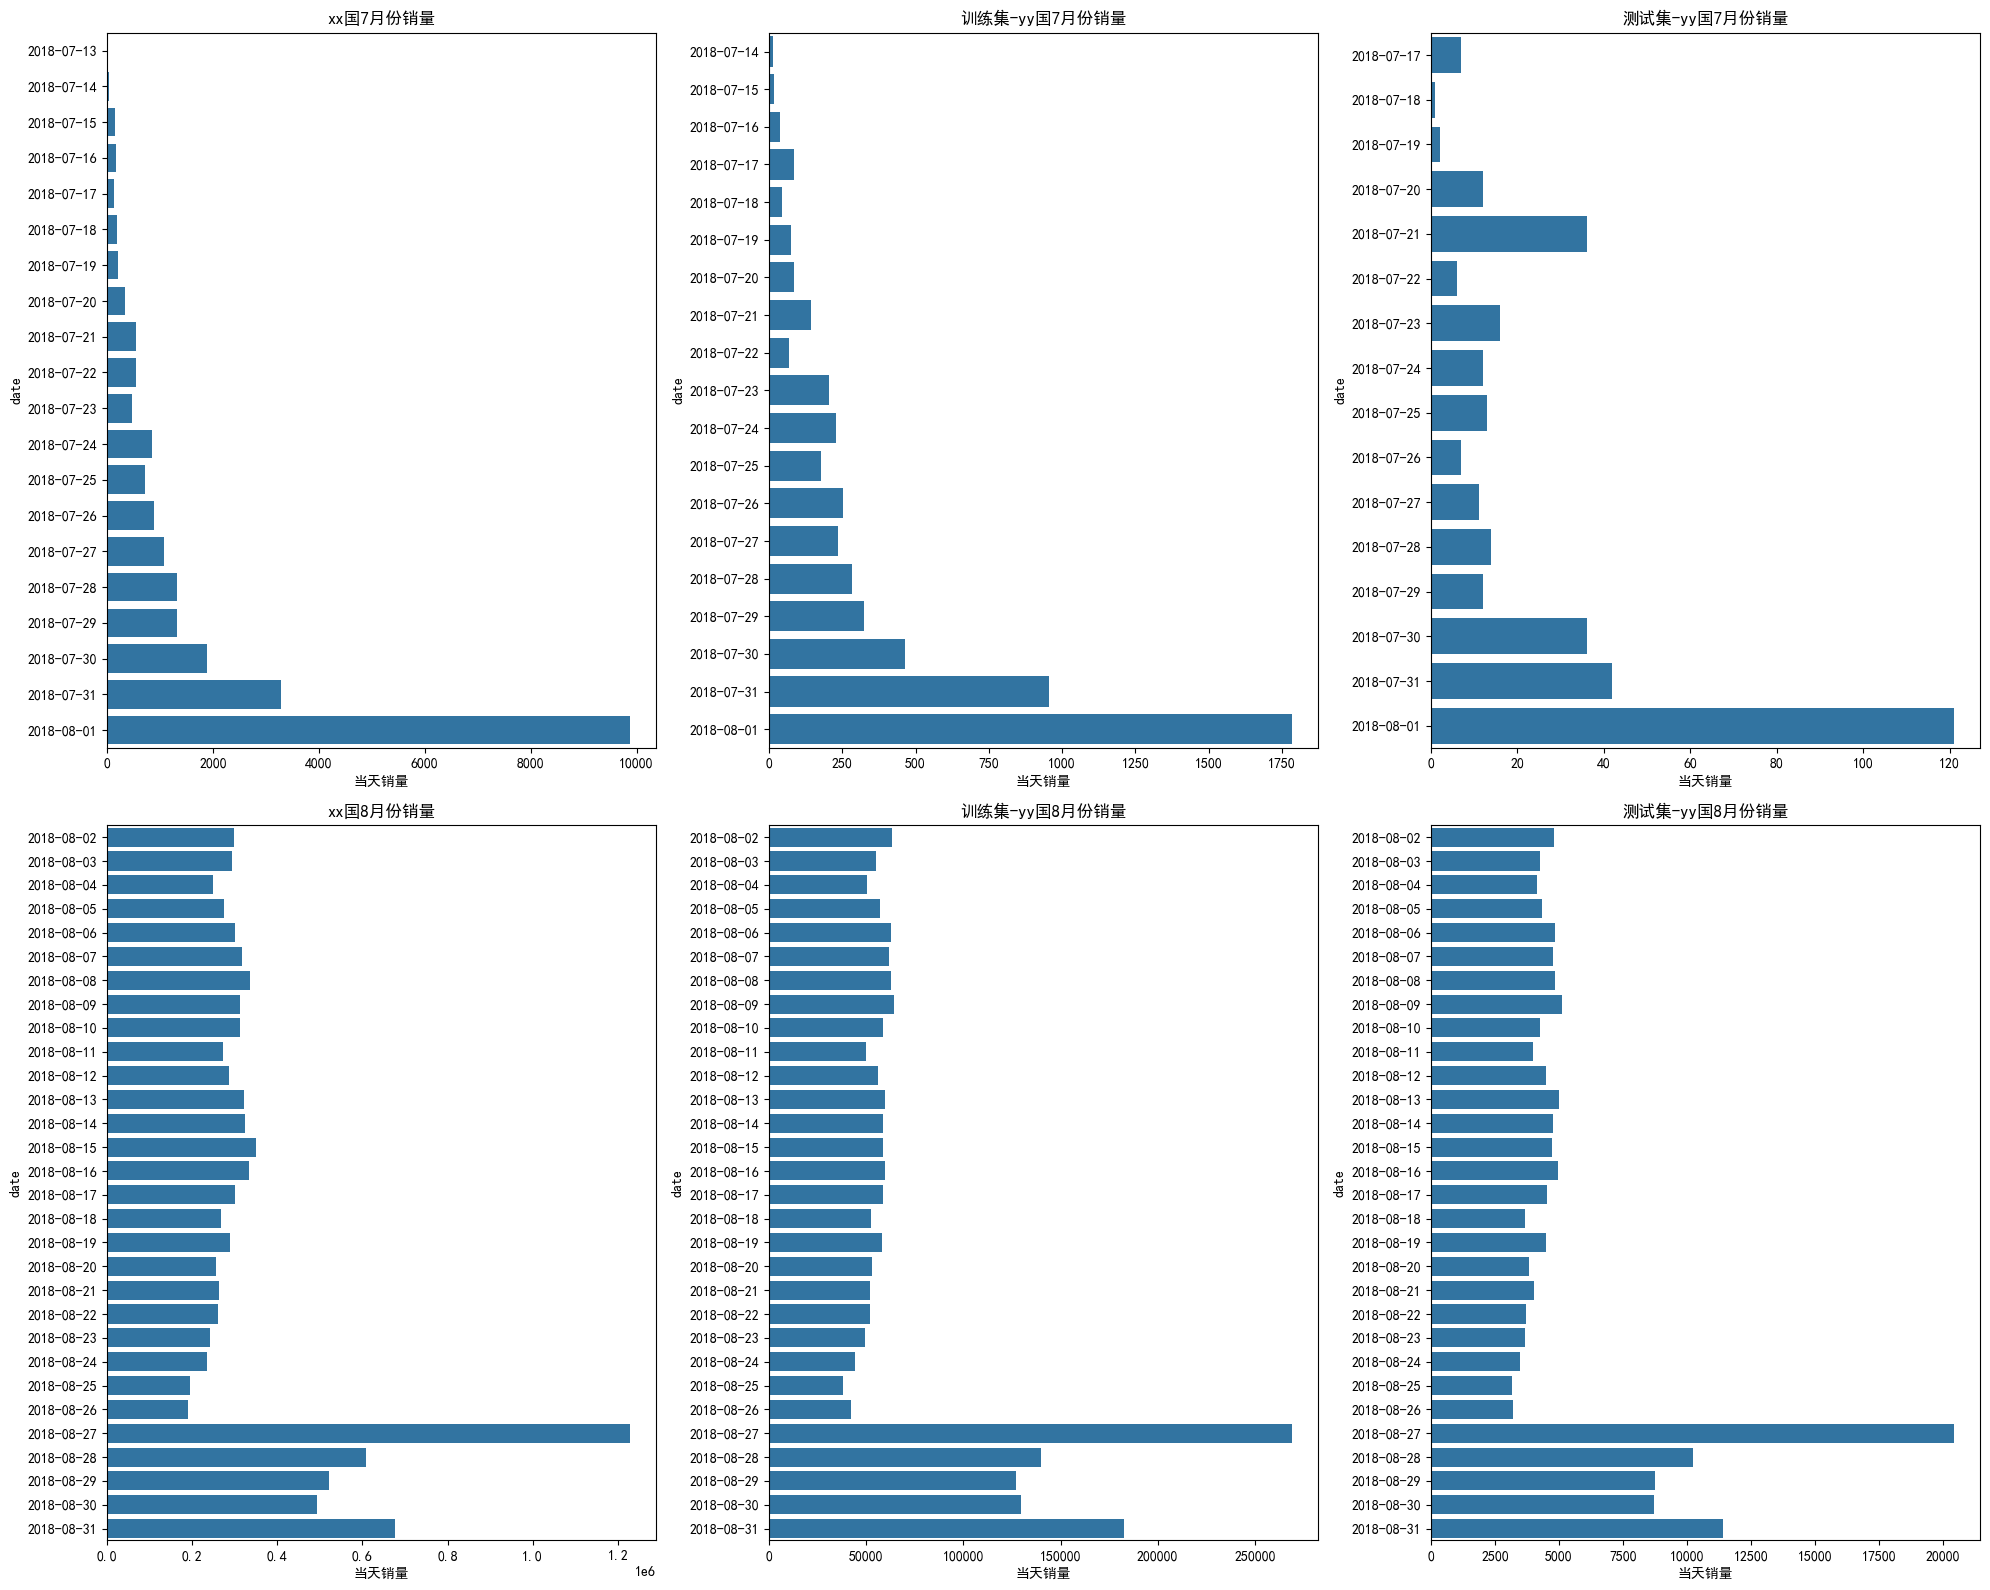

In [87]:
fig, ax = plt.subplots(2, 3, figsize=(20,16))
def barplot(ax, df, title):
    df['date'] = df['date'].astype(str)
    sns.barplot(y='date', x='当天销量' ,data=df, order=sorted(df['date'].unique()), ax=ax, estimator=np.mean)\
    .set_title(title)
    
barplot(ax[0][0], seven[(seven['is_train']==1) & (seven['buyer_country_id']=='xx')], 'xx国7月份销量')
barplot(ax[1][0], eight[(eight['is_train']==1) & (eight['buyer_country_id']=='xx')], 'xx国8月份销量')
barplot(ax[0][1], seven[(seven['is_train']==1) & (seven['buyer_country_id']=='yy')], '训练集-yy国7月份销量')
barplot(ax[1][1], eight[(eight['is_train']==1) & (eight['buyer_country_id']=='yy')], '训练集-yy国8月份销量')
barplot(ax[0][2], seven[(seven['is_train']==0) & (seven['buyer_country_id']=='yy')], '测试集-yy国7月份销量')
barplot(ax[1][2], eight[(eight['is_train']==0) & (eight['buyer_country_id']=='yy')], '测试集-yy国8月份销量')
plt.tight_layout()

## 每日uv与商品数(去重)

In [88]:
unique = df.groupby(['is_train', 'buyer_country_id', 'date']).agg({'buyer_admin_id':'nunique','item_id':['nunique','size']})
unique.columns = ['uv','商品数(去重)', '销量']
unique = unique.reset_index()
unique = pd.melt(unique, id_vars=['is_train', 'buyer_country_id', 'date'], value_vars=['uv', '商品数(去重)', '销量'])
unique['date'] = unique['date'].astype(str)
unique = unique[unique['date']>='2018-08-02']

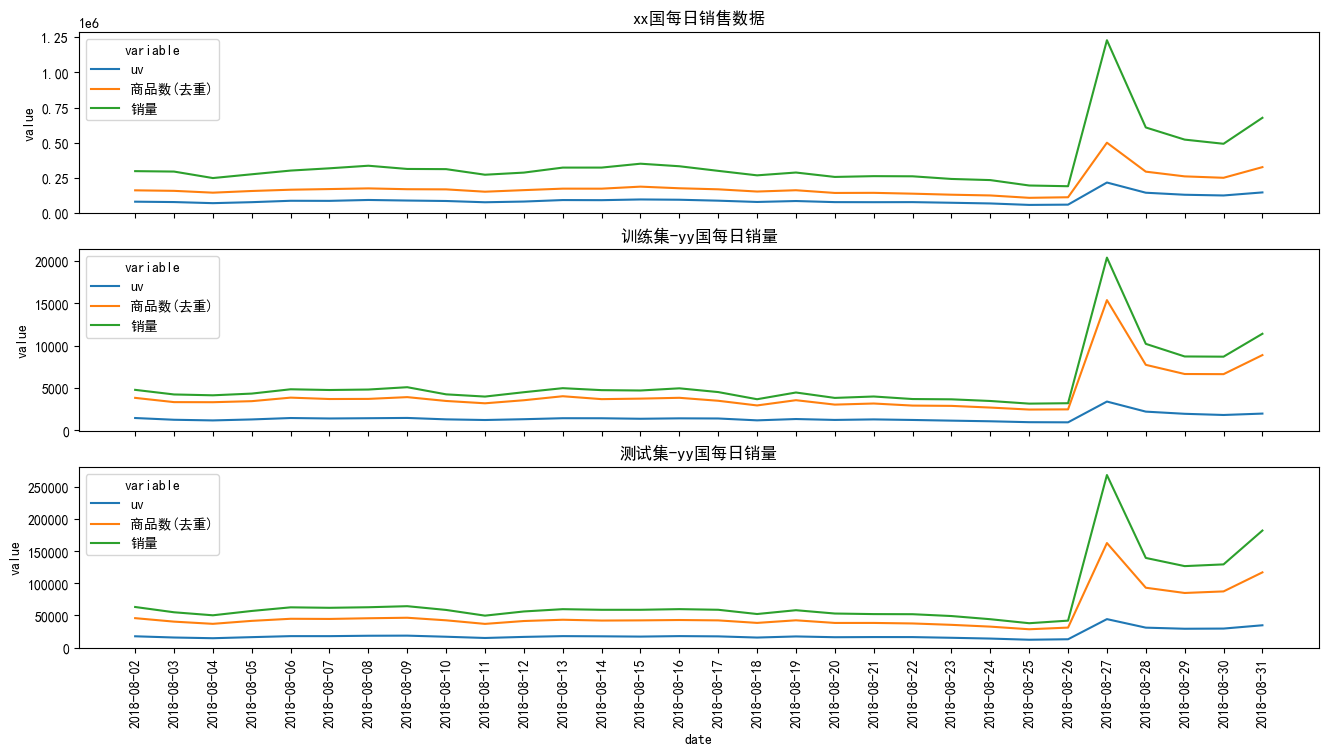

In [89]:
fig, ax = plt.subplots(3, 1, figsize=(16,8), sharex=True)
sns.lineplot(x='date', y='value', hue='variable', data=unique[(unique['is_train']==1) & (unique['buyer_country_id']=='xx')], 
             estimator=np.mean, ax=ax[0]).set_title('xx国每日销售数据');

sns.lineplot(x='date', y='value', hue='variable', data=unique[(unique['is_train']==0) & (unique['buyer_country_id']=='yy')], 
            estimator=np.mean, ax=ax[1]).set_title('训练集-yy国每日销量');

sns.lineplot(x='date', y='value', hue='variable', data=unique[(unique['is_train']==1) & (unique['buyer_country_id']=='yy')], 
            estimator=np.mean, ax=ax[2]).set_title('测试集-yy国每日销量')
plt.xticks(rotation=90);

# BASELINE

- 选取用户近30次购买记录作为预测值，越近购买的商品放在越靠前的列，不够30次购买记录的用热销商品5595070填充

In [90]:
test = pd.read_csv('./Antai_AE_round1_test_20190626.csv')
tmp = test[test['irank']<=31].sort_values(by=['buyer_country_id', 'buyer_admin_id', 'irank'])[['buyer_admin_id','item_id','irank']]
sub = tmp.set_index(['buyer_admin_id', 'irank']).unstack(-1)
sub.fillna(5595070).astype(int).reset_index().to_csv('./submit_sub.csv', index=False, header=None)

In [91]:
# 最终提交文件格式
sub = pd.read_csv('./submit_sub.csv', header = None)
sub.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,152,8410857,7937154,8472223,4016066,9891513,8064216,8351840,5595070,5595070,...,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070
1,282,11721802,7665423,7665423,10808393,11310708,623582,6547607,2605373,688799,...,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070
2,321,1461800,7379845,9243286,7379845,627849,5000759,11774753,10932288,4813286,...,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070
3,809,2347616,5707010,6339286,5492003,1207574,5707010,5492003,1207574,2262443,...,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070
4,870,11382694,5999244,6611583,7412272,4343647,5546383,3432696,9589237,6163411,...,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070,5595070
